In [3]:
# Import Libraries
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import datapane as dp
#try:
   # import datapane as dp
#except ModuleNotFoundError:
  #  !pip install datapane
  #  import datapane as dp

C:\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


DataFrame car_crashes
---

In [2]:
# uploaded the car_crashes DataFrame 
df = sns.load_dataset('car_crashes')

**car_crashes dataset overview:**

  - total -> Number of drivers involved in fatal collisions per billion miles
  - speeding -> Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
  - alcohol -> Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
  - not_distracted -> Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
  - no_previous -> Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents 
  - ins_premium -> Car Insurance Premiums
  - ins_losses -> Losses incurred by insurance companies for collisions per insured driver
  - abbrev -> USA states

In [1]:
car_crashes_overview = '''
- Total: Number of drivers involved in fatal collisions per billion miles
- Speeding: Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
- Alcohol: Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
- Not_distracted: Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
- No_previous: Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
- Ins_premium: Car Insurance Premiums
- Ins_losses: Losses incurred by insurance companies for collisions per insured driver
- Abbrev: USA states'''
heatmap_conclusions = '''- The highest correlation between number of drivers involved in fatal collisions per billion miles and percentage of drivers involved in fatal collisions who had not been involved in any previous accidents.'''
spd_alc_conclusions = '''- The graphs show which US states have the highest percentage of people involved in fatal crashes who were speeding or who were alcohol-impaired.'''
fig_cleared_conclusions = '''- The value of the median total payment for a different number of passengers is higher when paying by credit card
- Total payment range is wider when paying by credit card'''
fig_uncleaned_conclusions = '''- The figure with uncleaned data contains more outliers than the previous figure with cleared data'''
scatt_plt_uncleaned_conclusions = '''- The first two graphs show that the fare and tips are generally increasing with a greater distance
- Most passengers travel alone
- Most often pay by credit card'''
scatt_plt_cleared_conclusions = '''- The figure with uncleaned data contains more outliers than the previous figure with cleared data'''
purpose = '''- Demonstration of data exploratory analysis & visualizations skills'''
tools = '''- Python 3.10.10, Jupyter Lab, numpy, seaborn, matplotlib, pandas, datapane'''
content = '''- These datasets are taken from the online repository, using the seaborn library to demonstrate the skills.
- The car crashes dataset contains data on car accidents in the US states: percentage of drivers involved in fatal collisions who were speeding, or who were alcohol-impaired, or who were not distracted, etc.
- The taxis dataset contains data about taxi trips: tips, total cost, payment method, distance, etc.'''

In [4]:
df.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [6]:
len(df.abbrev.unique())

51

**1. Demonstrate a correlation between all the numeric columns graphically.**

In [7]:
# Computed pairwise correlation of the columns
df_cor = df.corr(numeric_only=True)

In [8]:
df_cor

total  speeding   alcohol  not_distracted  no_previous  \
total           1.000000  0.611548  0.852613        0.827560     0.956179   
speeding        0.611548  1.000000  0.669719        0.588010     0.571976   
alcohol         0.852613  0.669719  1.000000        0.732816     0.783520   
not_distracted  0.827560  0.588010  0.732816        1.000000     0.747307   
no_previous     0.956179  0.571976  0.783520        0.747307     1.000000   
ins_premium    -0.199702 -0.077675 -0.170612       -0.174856    -0.156895   
ins_losses     -0.036011 -0.065928 -0.112547       -0.075970    -0.006359   

                ins_premium  ins_losses  
total             -0.199702   -0.036011  
speeding          -0.077675   -0.065928  
alcohol           -0.170612   -0.112547  
not_distracted    -0.174856   -0.075970  
no_previous       -0.156895   -0.006359  
ins_premium        1.000000    0.623116  
ins_losses         0.623116    1.000000

In [9]:
# masked the upper triangle of a matrix
mask = np.triu(df_cor)

<Axes: title={'center': 'Correlation between all the numeric columns'}>

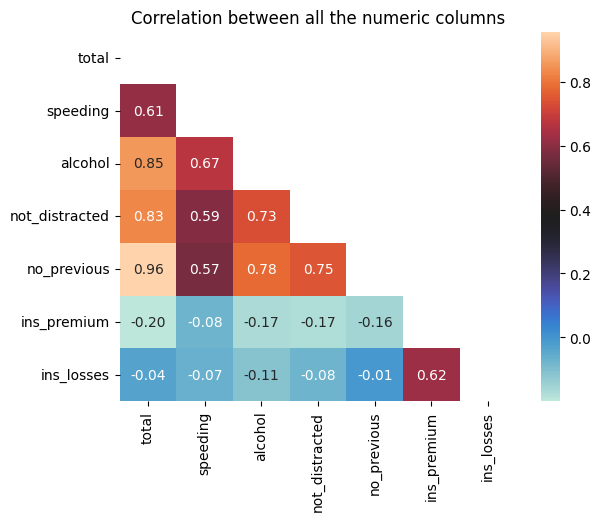

In [10]:
car_heatmap = sns.heatmap(df_cor, annot=True, fmt='.2f', cmap='icefire', mask=mask)
car_heatmap.set_title('Correlation between all the numeric columns')
car_heatmap

## Conclusions:

- The highest correlation between number of drivers involved in fatal collisions per billion miles and percentage of drivers involved in fatal collisions who had not been involved in any previous accidents

___


**2. The left plot demonstrates a percentage of drivers who were speeding per US state and the right one - the percentage of drivers who were alcohol-impaired per US state.**

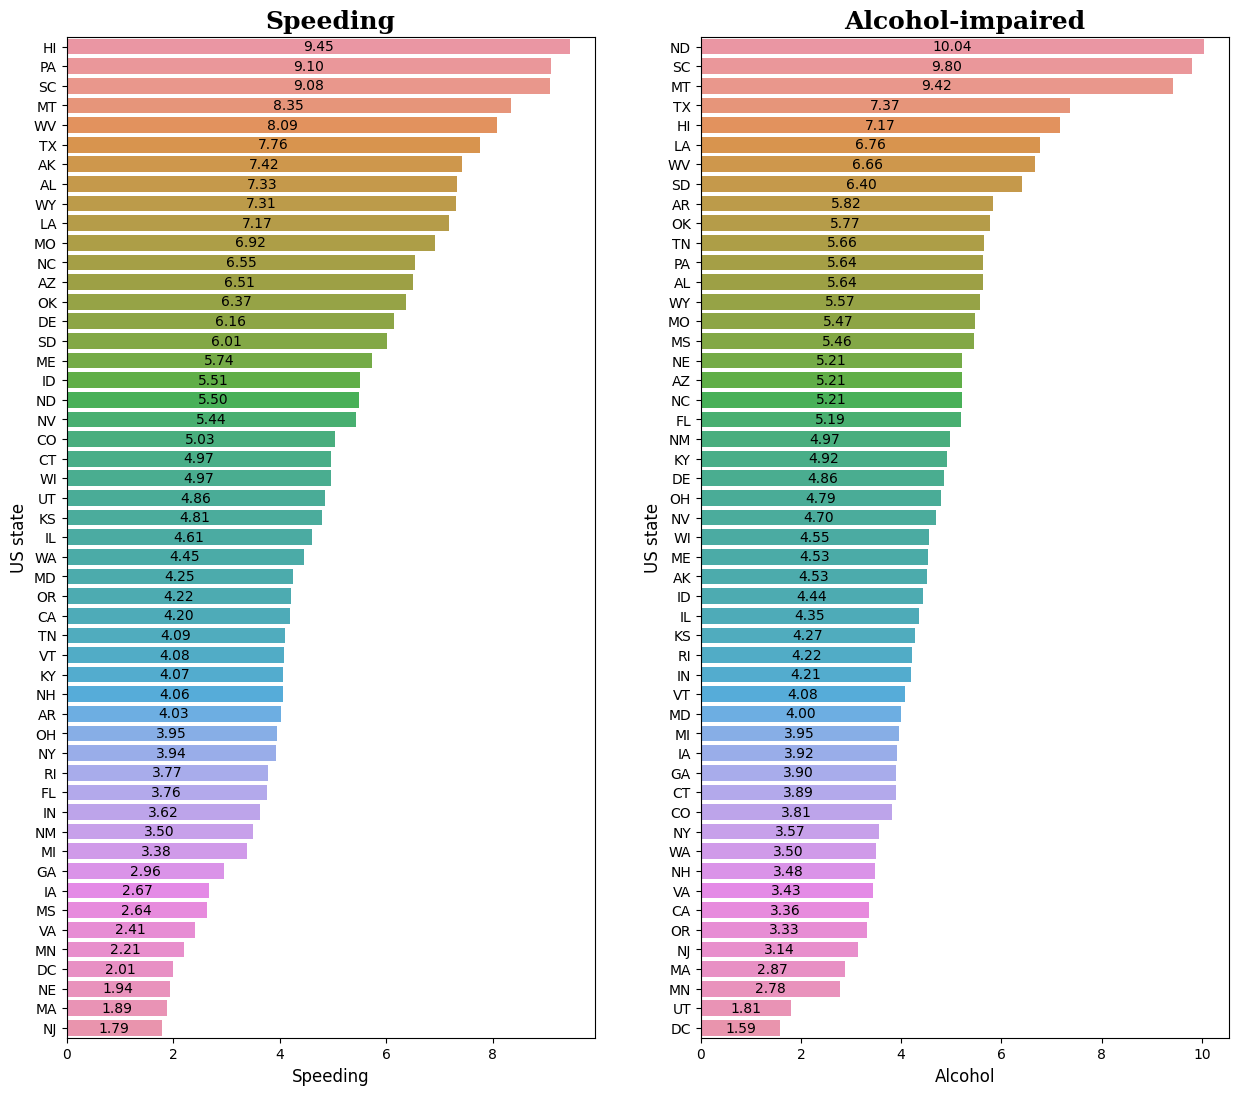

In [11]:
speeeding_alcohol_barplot, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 13))

sns.barplot(data=df, ax=ax1, x='speeding', y='abbrev', errwidth=0, order=df.sort_values('speeding', ascending = False).abbrev)
ax1.set_title('Speeding', fontdict= {'fontsize': 18, 'fontweight':'bold', 'fontfamily':'serif'}, loc = 'center')
ax1.set_xlabel('Speeding', fontdict= {'fontsize': 12})
ax1.set_ylabel('US state', fontdict= {'fontsize': 12})
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2f', label_type='center')


sns.barplot(data=df, ax=ax2, x='alcohol', y='abbrev', errwidth=0, order=df.sort_values('alcohol', ascending = False).abbrev)
ax2.set_title('Alcohol-impaired', fontdict= {'fontsize': 18, 'fontweight':'bold', 'fontfamily':'serif'}, loc = 'center')
ax2.set_xlabel('Alcohol', fontdict= {'fontsize': 12})
ax2.set_ylabel('US state', fontdict= {'fontsize': 12})
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2f', label_type='center')

## Conclusions:

- The graphs show which US states have the highest percentage of people involved in fatal crashes who were speeding or who were alcohol-impaired
___

DataFrame taxis
---

In [4]:
# uploaded the taxi DataFrame
df2 = sns.load_dataset('taxis')
df2.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [8]:
df2[df2.payment.isna()]

pickup             dropoff  passengers  distance  fare  tip  \
7    2019-03-22 12:47:13 2019-03-22 12:58:17           0       1.4   8.5  0.0   
445  2019-03-19 06:57:14 2019-03-19 07:00:08           1       1.3   5.5  0.0   
491  2019-03-07 07:11:33 2019-03-07 07:11:39           1       1.6   2.5  0.0   
545  2019-03-27 11:03:43 2019-03-27 11:14:34           1       4.2  15.0  0.0   
621  2019-03-15 17:16:35 2019-03-15 17:25:01           1       1.3   7.5  0.0   
770  2019-03-02 03:16:59 2019-03-02 03:17:06           0       9.4   2.5  0.0   
913  2019-03-23 11:26:58 2019-03-23 11:35:17           2       1.3   7.5  0.0   
953  2019-03-08 02:58:37 2019-03-08 03:19:27           2       6.9  23.5  0.0   
1207 2019-03-08 15:41:20 2019-03-08 15:41:23           1       0.0   2.5  0.0   
1372 2019-03-12 09:19:44 2019-03-12 09:43:09           1       1.6  14.5  0.0   
1566 2019-03-18 02:20:59 2019-03-18 02:49:24           1       6.0  23.0  0.0   
1690 2019-03-22 06:24:14 2019-03-22 06:24:14           1       0.0  72.0  0.0   
1704 2019-03-17 04:22:54 2019-03-17 04:44:43           2       4.3  17.5  0.0   
1737 2019-03-29 19:43:51 2019-03-29 19:52:28           1       3.7  12.0  0.0   
1851 2019-03-02 19:20:18 2019-03-02 19:21:06           1       0.1   2.5  0.0   
1860 2019-03-01 11:58:50 2019-03-01 12:10:26           1       0.9   8.5  0.0   
1929 2019-03-13 22:35:35 2019-03-13 22:35:49           1       0.0   2.5  0.0   
1941 2019-03-30 16:57:00 2019-03-30 17:16:31           2       2.6  14.5  0.0   
2353 2019-03-21 10:46:14 2019-03-21 11:06:33           2       2.8  14.0  0.0   
2444 2019-03-10 11:06:54 2019-03-10 11:16:13           1       1.4   8.0  0.0   
3109 2019-03-01 22:48:59 2019-03-01 22:50:37           1       0.0   3.0  0.0   
3372 2019-03-09 13:48:43 2019-03-09 13:59:10           0       1.3   8.5  0.0   
3793 2019-03-24 06:07:30 2019-03-24 06:12:22           1       1.5   6.5  0.0   
3803 2019-03-28 19:48:00 2019-03-28 20:31:39           1      17.7  52.0  0.0   
3983 2019-03-06 21:20:27 2019-03-06 22:15:45           0       9.3  41.5  0.0   
4230 2019-03-13 15:39:06 2019-03-13 15:50:27           1       1.8   9.5  0.0   
4384 2019-03-14 06:58:59 2019-03-14 07:08:24           1       1.8   8.5  0.0   
4474 2019-03-09 00:20:47 2019-03-09 00:27:37           4       0.7   6.0  0.0   
4515 2019-03-31 09:42:47 2019-03-31 09:53:15           1       1.9   9.0  0.0   
4562 2019-03-03 23:02:48 2019-03-03 23:02:57           1       0.1  20.0  0.0   
4746 2019-03-12 07:06:07 2019-03-12 07:06:21           1       1.3   2.5  0.0   
4801 2019-03-26 15:30:50 2019-03-26 15:42:59           1       1.2   9.0  0.0   
4842 2019-03-08 02:56:38 2019-03-08 03:07:24           1       2.4  10.5  0.0   
4915 2019-03-02 19:01:36 2019-03-02 19:08:46           0       1.4   7.0  0.0   
4955 2019-03-23 11:07:11 2019-03-23 11:32:46           1       0.0  19.0  0.0   
5046 2019-03-15 00:10:38 2019-03-15 00:21:39           1       3.1  12.5  0.0   
5068 2019-03-30 11:38:20 2019-03-30 11:40:45           1       0.2   3.5  0.0   
5207 2019-03-19 12:30:27 2019-03-19 12:49:12           0       2.1  13.0  0.0   
5284 2019-03-22 06:24:02 2019-03-22 06:24:11           1       1.7   2.5  0.0   
5586 2019-03-22 22:56:44 2019-03-22 23:02:09           1       1.0   5.5  0.0   
5809 2019-03-02 16:24:08 2019-03-02 16:26:36           1       0.6   4.0  0.0   
5821 2019-03-11 19:36:02 2019-03-11 19:36:14           1       0.1   2.5  0.0   
6169 2019-03-27 02:11:01 2019-03-27 02:12:03           1       4.1   3.0  0.0   
6311 2019-03-12 07:10:30 2019-03-12 07:14:18           1       0.7   4.5  0.0   

      tolls  total   color payment                     pickup_zone  \
7      0.00  11.80  yellow     NaN                     Murray Hill   
445    0.00   6.30  yellow     NaN                     Boerum Hill   
491    0.00   5.80  yellow     NaN                     Murray Hill   
545    0.00  15.80  yellow     NaN               LaGuardia Airport   
621    0.00  11.80  ye

In [14]:
# copy the DataFrame for further cleaning
df_clear = df2.copy()

In [15]:
# drop rows with NaN / None values in DataFrame
df_clear.dropna(inplace=True)

In [16]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

**3. Create boxplots those describe total payments depends on payments type (cash / credit card) for every passenger quantity.**

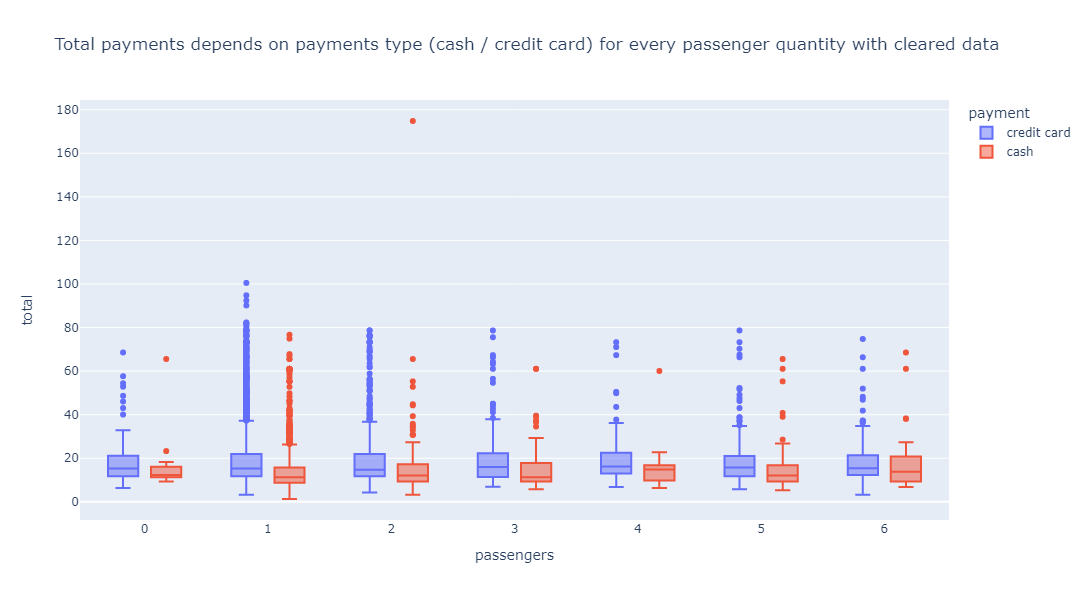

In [17]:
# figure with cleared data

fig_cleared = px.box(df_clear, x="passengers", y="total", color='payment', height=600, title='Total payments depends on payments type (cash / credit card) for every passenger quantity with cleared data')
fig_cleared.show()

## Conclusions:

- The value of the median total payment for a different number of passengers is higher when paying by credit card
- Total payment range is wider when paying by credit card

In [18]:
# check the outlier more precisely
df_clear[(df_clear.total > 170) & (df_clear.passengers == 2)] 

pickup             dropoff  passengers  distance   fare  \
5364 2019-03-17 16:59:17 2019-03-17 18:04:08           2      36.7  150.0   

      tip  tolls   total   color payment  pickup_zone dropoff_zone  \
5364  0.0  24.02  174.82  yellow    cash  JFK Airport  JFK Airport   

     pickup_borough dropoff_borough  
5364         Queens          Queens

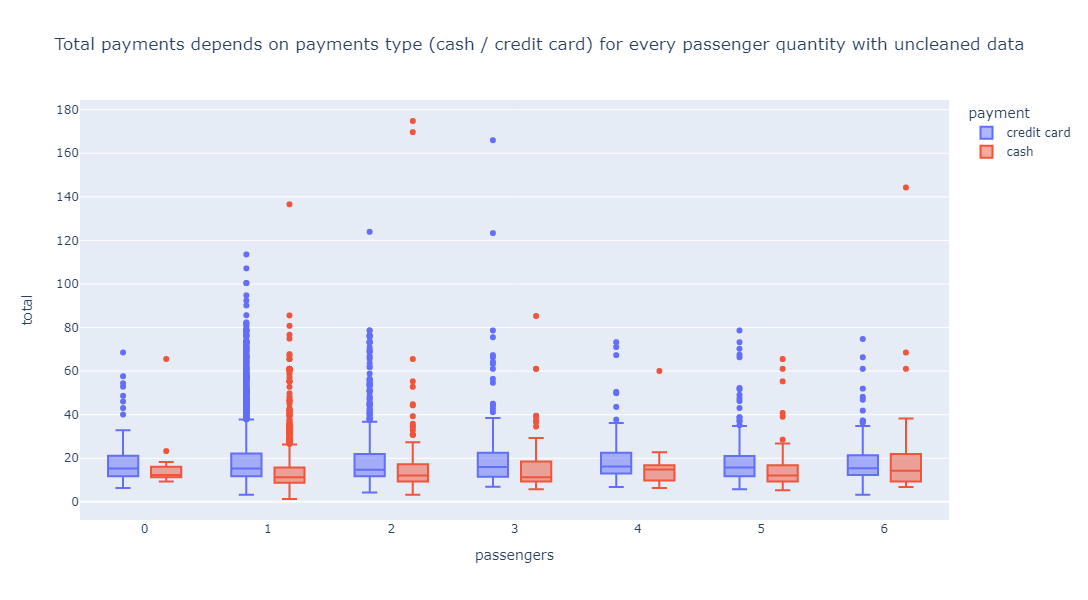

In [19]:
# figure with uncleaned data

fig_uncleaned = px.box(df2, x="passengers", y="total", color='payment', height=600, title='Total payments depends on payments type (cash / credit card) for every passenger quantity with uncleaned data')
fig_uncleaned.show()

## Conclusions:

- The figure with uncleaned data contains more outliers than the previous figure with cleared data
___

**4. First scatterplot shows relationship between distance and fare, second one - between distance and tip. Also, every value on these scatterplots represents payment type and number of passengers. \
The histogram demonstrate distribution of distance values shown in percent.**

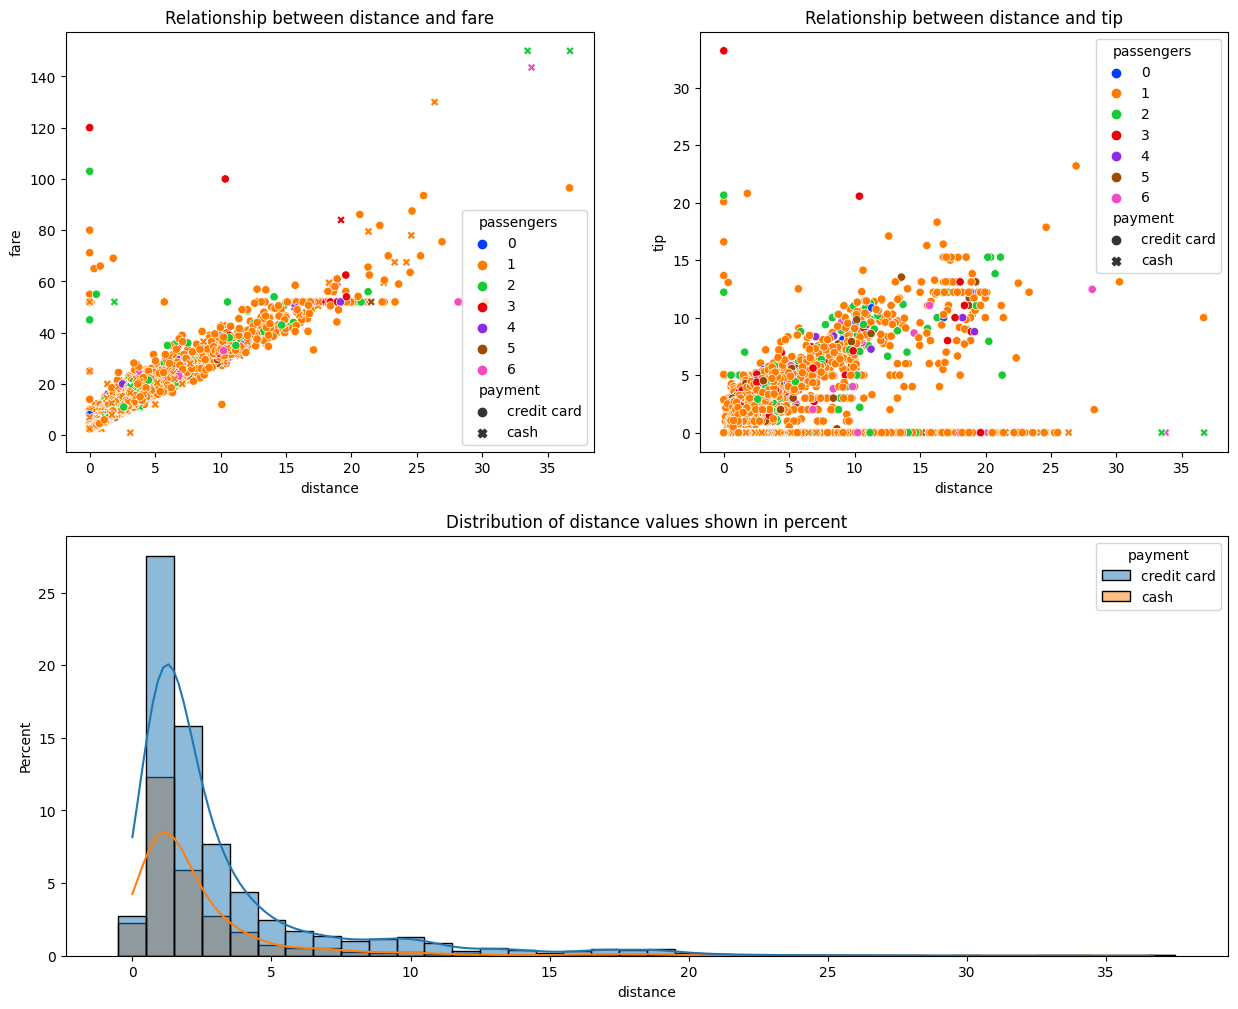

In [20]:
# figure with uncleaned data

scatt_plt_uncleaned = plt.figure(figsize=(15, 12))
gs = scatt_plt_uncleaned.add_gridspec(nrows=2, ncols=2)

ax1 = scatt_plt_uncleaned.add_subplot(gs[0, 0])
ax2 = scatt_plt_uncleaned.add_subplot(gs[0, 1])
ax3 = scatt_plt_uncleaned.add_subplot(gs[1, :])

sns.scatterplot(data=df2, ax=ax1, x='distance', y='fare', palette='bright', hue='passengers', style='payment')
sns.scatterplot(data=df2, ax=ax2, x='distance', y='tip', palette='bright', hue='passengers', style='payment')
sns.histplot(data=df2, x='distance', ax=ax3, hue='payment', stat='percent', kde=True, discrete=True)

ax1.set_title('Relationship between distance and fare')
ax2.set_title('Relationship between distance and tip')
ax3.set_title('Distribution of distance values shown in percent')

plt.show()

## Conclusions:

- The first two graphs show that the fare and tips are generally increasing with a greater distance
- Most passengers travel alone
- Most often pay by credit card
---

Text(0.5, 1.0, 'Distribution of distance values shown in percent')

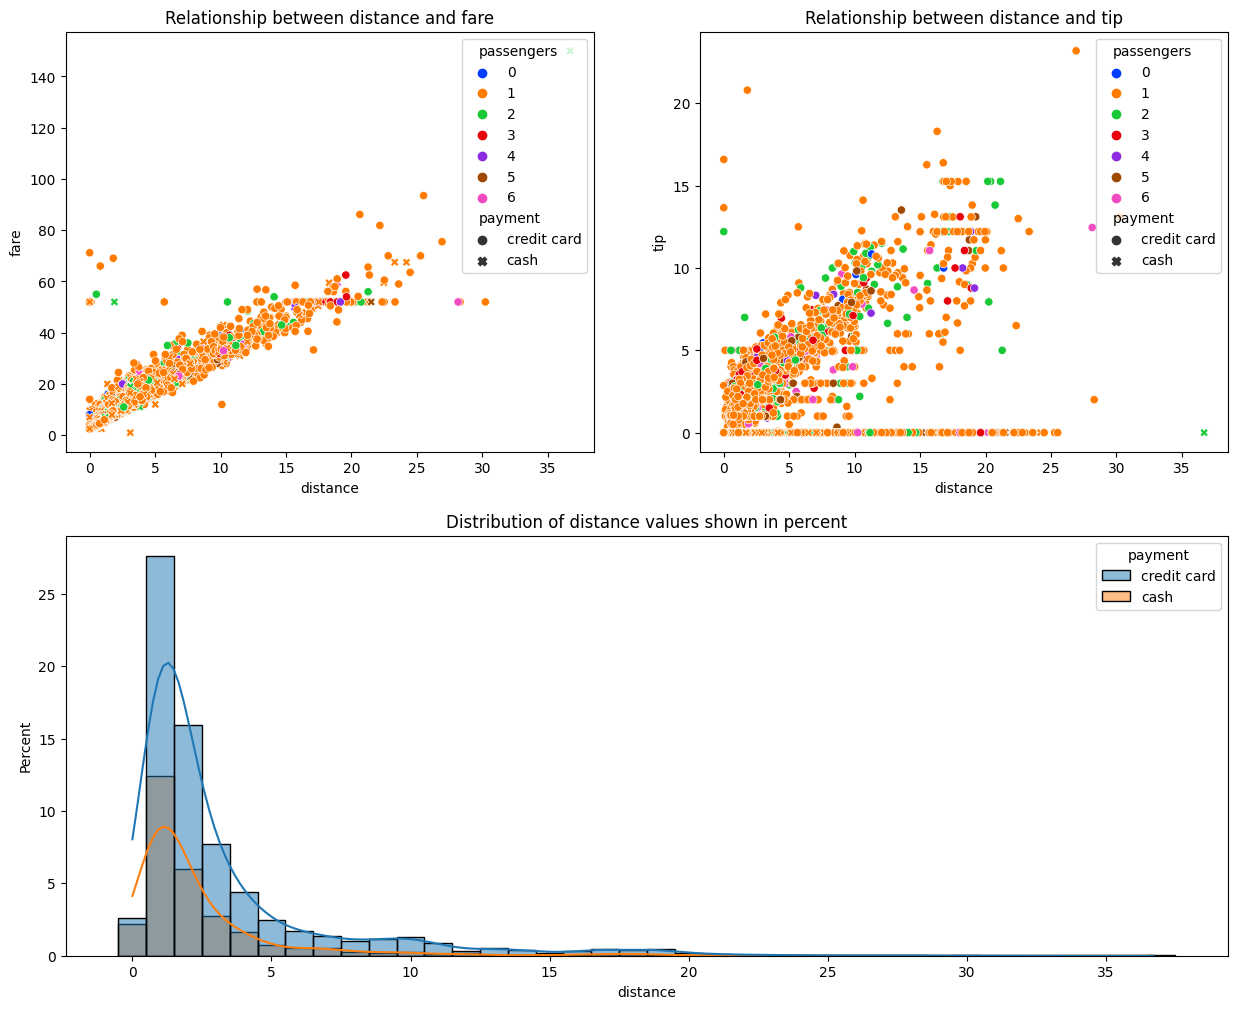

In [21]:
# figure with cleared data

scatt_plt_cleared = plt.figure(figsize=(15, 12))
gs = scatt_plt_cleared.add_gridspec(nrows=2, ncols=2)

ax1 = scatt_plt_cleared.add_subplot(gs[0, 0])
ax2 = scatt_plt_cleared.add_subplot(gs[0, 1])
ax3 = scatt_plt_cleared.add_subplot(gs[1, :])

sns.scatterplot(data=df_clear, ax=ax1, x='distance', y='fare', palette='bright', hue='passengers', style='payment')
sns.scatterplot(data=df_clear, ax=ax2, x='distance', y='tip', palette='bright', hue='passengers', style='payment')
sns.histplot(data=df_clear, x='distance', ax=ax3, hue='payment', stat='percent', kde=True, discrete=True)

ax1.set_title('Relationship between distance and fare')
ax2.set_title('Relationship between distance and tip')
ax3.set_title('Distribution of distance values shown in percent')

## Conclusions:

- The figure with uncleaned data contains more outliers than the previous figure with cleared data
___

# Report

In [54]:
report_practic = dp.App(
    dp.Page(
        dp.Text('## Link to the source code on Kaggle:'),
        dp.Text('[The source code on Kaggle](https://www.kaggle.com/code/gertrudajk/car-crashes-taxi)'),
        dp.Text('# DataFrame car crashes & DataFrame taxis'),
        dp.Text('## Purpose:'),
        dp.Text(purpose),
        dp.Text('## Content:'),
        dp.Text(content),
        dp.Text('## Tools:'),
        dp.Text(tools),
        title='Report review'
    ),
    
    dp.Page(
        dp.Text('# DataFrame car crashes'),
        dp.Text('## Car crashes dataset overview:'),
        dp.Text(car_crashes_overview),
        dp.DataTable(df),
        dp.Text('## 1. The correlation between all numerical columns is graphically demonstrated.'),
        dp.Plot(car_heatmap, responsive=False),
        dp.Text('## Conclusions:'),
        dp.Text(heatmap_conclusions),
        dp.Text('## 2. The left plot demonstrates a percentage of drivers who were speeding per US state and the right one - the percentage of drivers who were alcohol-impaired per US state.'),
        dp.Plot(speeeding_alcohol_barplot),
        dp.Text('## Conclusions:'),
        dp.Text(spd_alc_conclusions),
        title='Car crashes'
    ),
    
    dp.Page(
        dp.Text('# DataFrame taxis'),
        dp.Text('## Taxi dataset overview before data cleaning:'),
        dp.DataTable(df2),
        dp.Text('## Taxi dataset after data cleaning:'),
        dp.Text('- Prepared data for analysis: deleted rows with empty values'),
        dp.DataTable(df_clear),
        dp.Text('## 1. Boxplots those describe total payments depends on payments type (cash / credit card) for every passenger quantity.'),
        dp.Plot(fig_cleared),
        dp.Text('## Conclusions:'),
        dp.Text(fig_cleared_conclusions),
        dp.Plot(fig_uncleaned),
        dp.Text('## Conclusions:'),
        dp.Text(fig_uncleaned_conclusions),
        dp.Text('## 2. First scatterplot shows relationship between distance and fare, second one - between distance and tip. Also, every value on these scatterplots represents payment type and number of passengers. The histogram demonstrate distribution of distance values shown in percent.'),
        dp.Plot(scatt_plt_uncleaned),
        dp.Text('## Conclusions:'),
        dp.Text(scatt_plt_uncleaned_conclusions),
        dp.Plot(scatt_plt_cleared),
        dp.Text('## Conclusions:'),
        dp.Text(scatt_plt_cleared_conclusions),
        title='Taxi'
    )
)

In [55]:
report_practic.save('practic.html')

C:\Python310\lib\site-packages\datapane\common\df_processor.py:28: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



App saved to ./practic.html

In [56]:
report_practic.upload('Car_crashes&Taxi')

Uploading report and associated data - *please wait...*

Uploading files


Report successfully uploaded - view and share at <a href='https://cloud.datapane.com/reports/W3D1oy7/car-crashestaxi/' target='_blank'>here</a>.